# Cifar10 Image Classification

In [18]:
import cifar10
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score

In [2]:
# Loading the Dataset Downloaded
images_train, cls_train, labels_train = cifar10.load_training_data()
images_test, cls_test, labels_test = cifar10.load_test_data()

Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_1
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_2
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_3
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_4
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_5
Loading data: data/CIFAR-10/cifar-10-batches-py/test_batch


In [3]:
class_names = cifar10.load_class_names()
class_names

Loading data: data/CIFAR-10/cifar-10-batches-py/batches.meta


['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

## Plotting Images

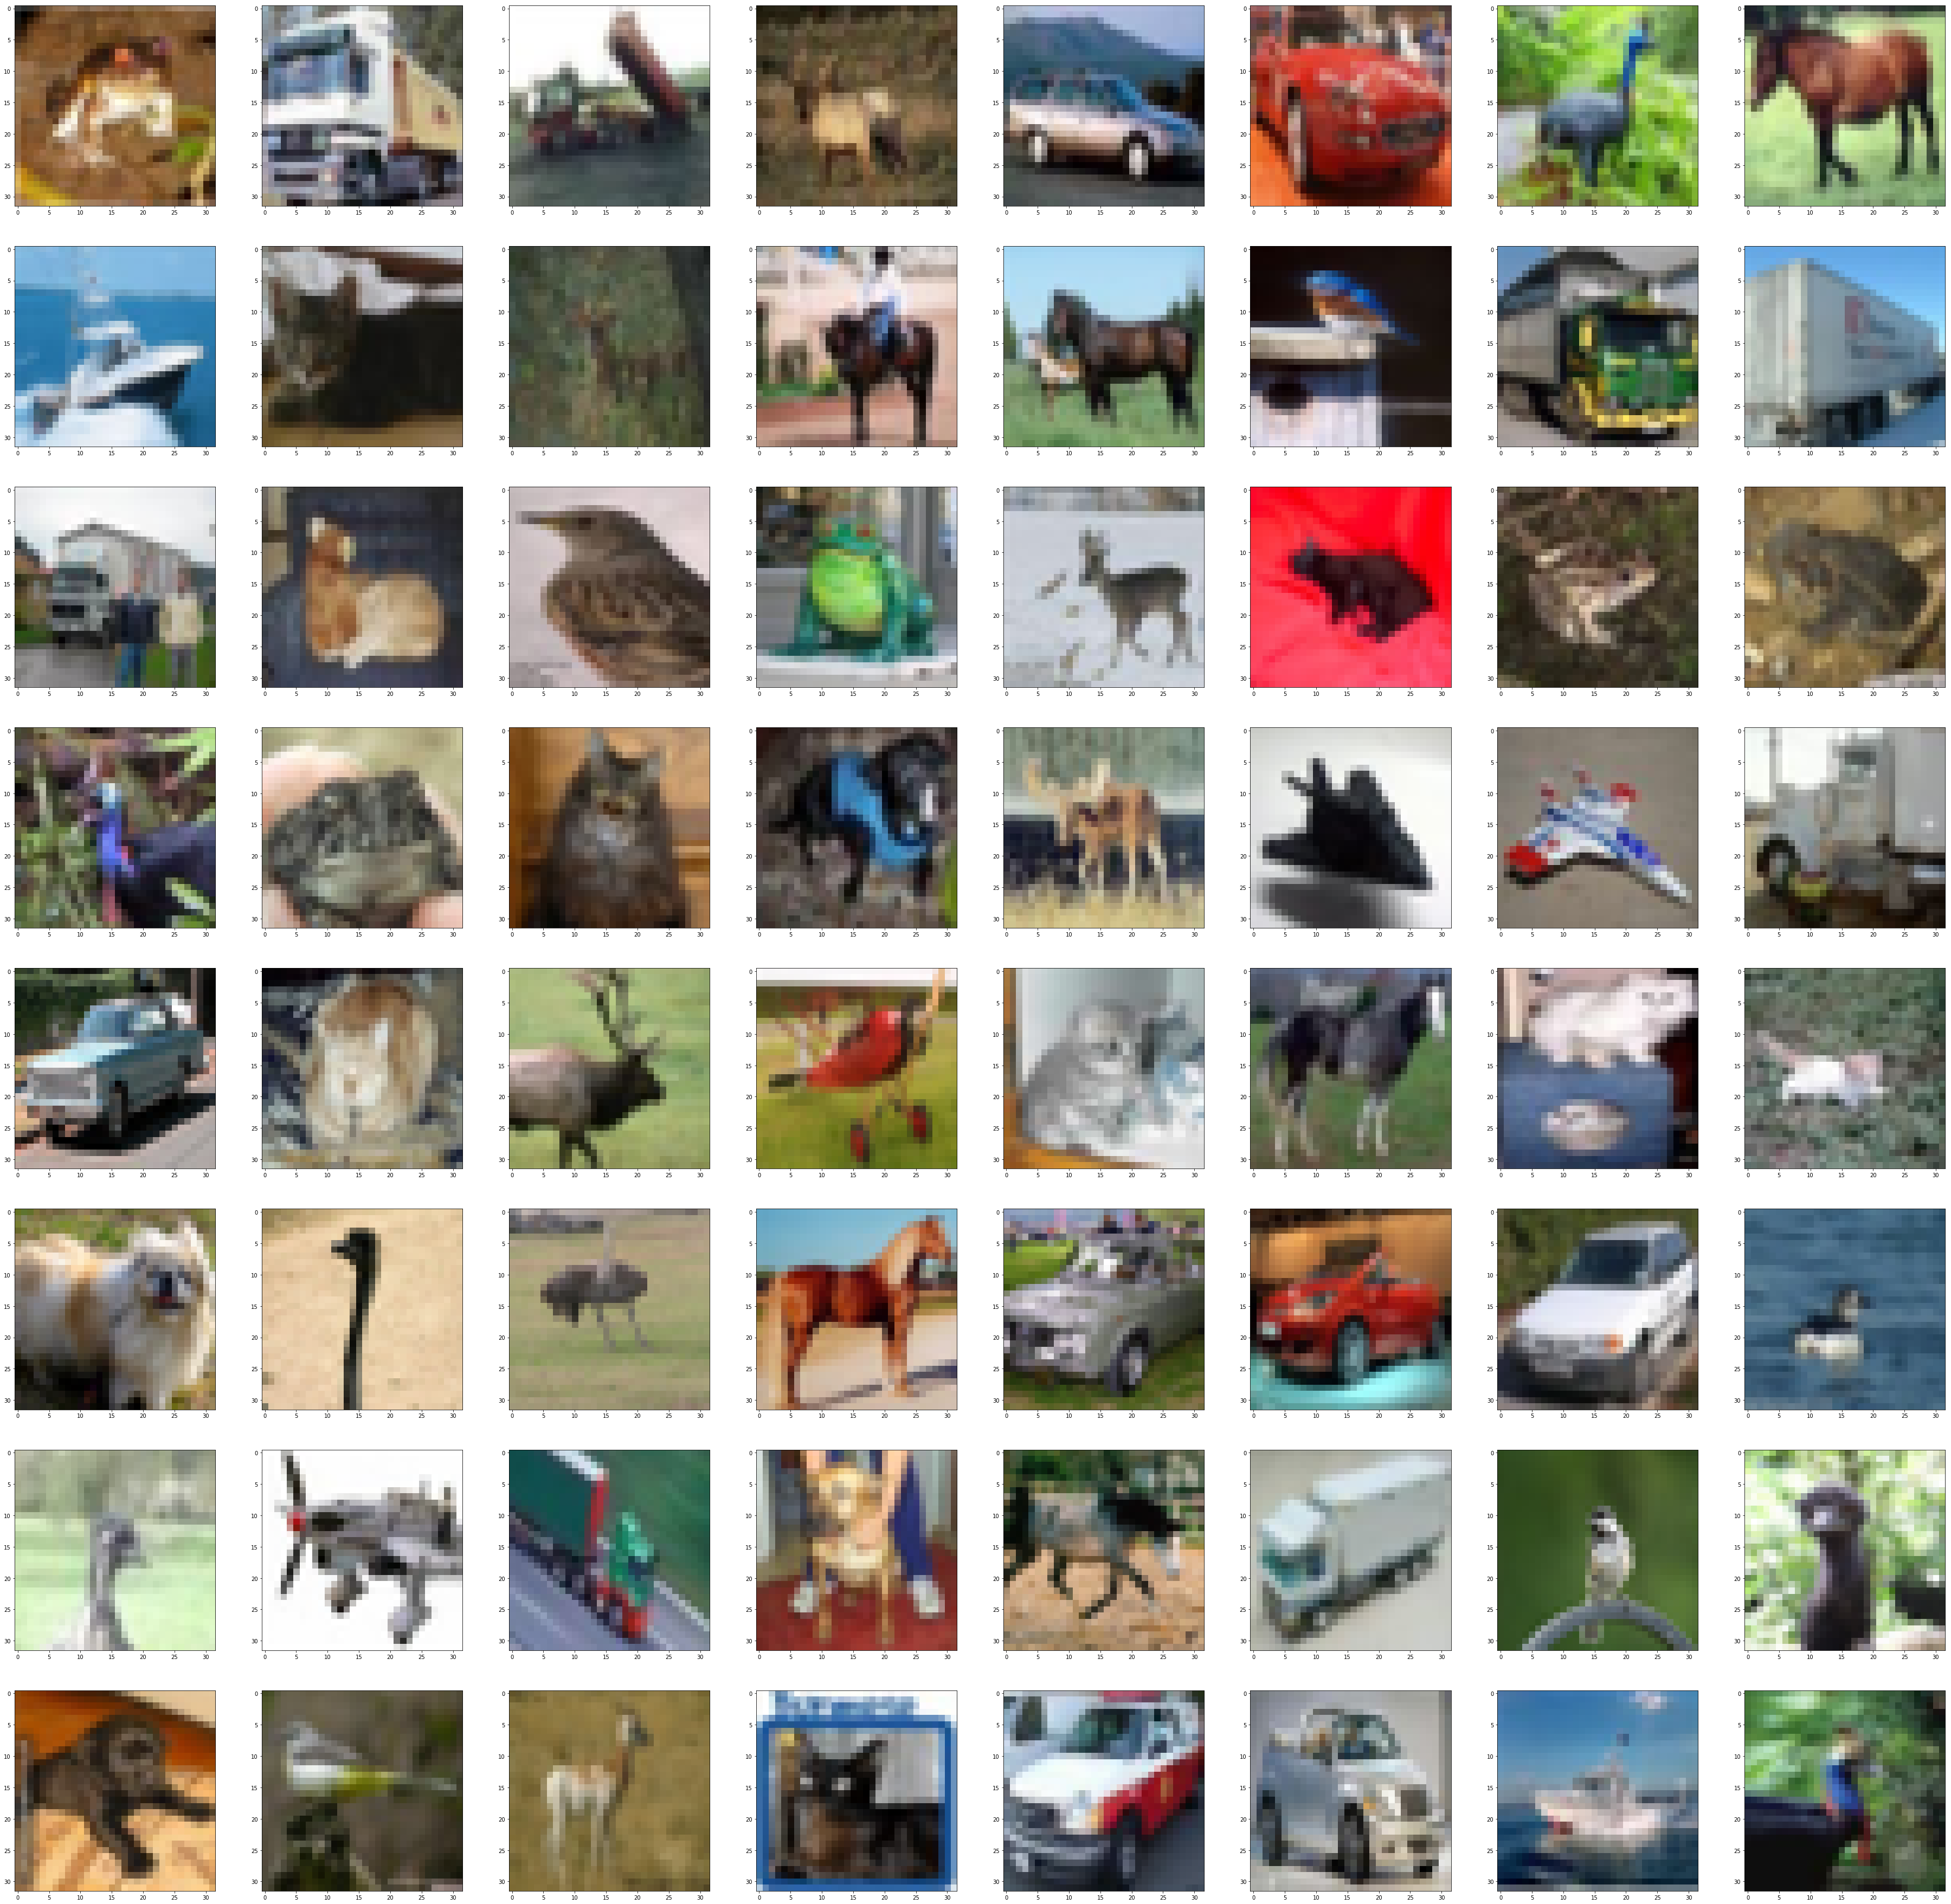

In [4]:
fig = plt.figure(figsize=(64,64))

for i in range(64):
    ax = fig.add_subplot(8,8,i+1)
    ax.imshow(images_train[i])
plt.show()    

### Reshaping

In [6]:
# To feed our data to PCA we need to reshape the data from 50000x32x32x3 to 50000x3072

x_train = images_train.reshape(images_train.shape[0],-1)
x_test = images_test.reshape(images_test.shape[0],-1)
y_train = cls_train
y_test = cls_test
print(x_train.shape)
print(x_test.shape)

(50000, 3072)
(10000, 3072)


## Principal Component Analysis

In [8]:
from sklearn.decomposition import PCA

In [9]:
pca = PCA()
pca.fit(x_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [10]:
# To find optimal number of principal components so that we maintain 95% Variance
current_variance = 0
total = sum(pca.explained_variance_)
optimal_components = 0

while current_variance/total <0.95:
    current_variance+=pca.explained_variance_[optimal_components]
    optimal_components+=1
optimal_components      

217

In [12]:
pca = PCA(n_components=optimal_components,whiten=True)
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)

## Random Forest Classifier

In [19]:
from sklearn.ensemble import RandomForestClassifier

In [22]:
rf = RandomForestClassifier()
rf.fit(x_train_pca,x_train)
y_predicted_rf = rf.predict(x_test_pca)

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [24]:
print("Accuracy : ", accuracy_score(y_test,y_predicted_rf))

Accuracy :  0.2804


## Logistic Regression

In [26]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train_pca,x_train)
y_predicted_lr = lr.predict(x_test_pca)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [27]:
print("Accuracy : ", accuracy_score(y_test,y_predicted_lr))

Accuracy :  0.4073


## KNN 

In [29]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train_pca,y_train)
y_predicted_knn = knn.predict(x_test_pca)

In [30]:
print("Accuracy : ", accuracy_score(y_test,y_predicted_knn))

Accuracy :  0.2283


### Decision Tree

In [35]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train_pca,y_train)
y_predicted_dt = dt.predict(x_test_pca)

In [36]:
print("Accuracy : ",accuracy_score(y_predicted_dt,y_test))

Accuracy :  0.255


## Support Vector Machine

In [37]:
from sklearn.svm import SVC
from time import time

In [38]:
svc = SVC(verbose=True)
start = time()
svc.fit(x_train_pca,y_train)
end = time() 
print("Time taken for Training: ",(end-start)/60," min")

/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[LibSVM]Time taken for Training:  15.718145934740702  min


In [39]:
y_predicted_svc = svc.predict(x_test_pca)
print("Accuracy : ",accuracy_score(y_test,y_predicted_svc))

Accuracy :  0.552


## Comparing all the Algorithms

In [40]:
print("Random Forest Classifier : ",accuracy_score(y_test,y_predicted_rf))
print("Logistic Regression Classifier : ",accuracy_score(y_test,y_predicted_lr))
print("KNN Classifier : ",accuracy_score(y_test,y_predicted_knn))
print("Support Vector Machine Classifier : ",accuracy_score(y_test,y_predicted_svc))

Random Forest Classifier :  0.2804
Logistic Regression Classifier :  0.4073
KNN Classifier :  0.2283
Support Vector Machine Classifier :  0.552


### The Maximum Accuracy is obtained by SVM : 55.27%

#### Converting Predicted data into labels

In [41]:
labels = []
for i in y_predicted_svc:
    labels.append(class_names[i])   

In [42]:
# Saving the Predicted Data into a cav file
np.savetxt('Predictions.csv',labels,fmt = '%s')